# **스택 자료 구조**



*   선입후출
*   입구와 출구가 동일한 형태로 스택



삽입과 삭제

In [ ]:
stack = []

stack.append(5)
stack.append(2)
stack.append(3)
stack.append(7)
stack.pop()
stack.append(1)
stack.append(4)
stack.pop()

print(stack[::-1])#최상단 원소부터 출력
print(stack) #최하단 원소부터 출력

[1, 3, 2, 5]
[5, 2, 3, 1]


# **큐 자료구조**




*   선입선출
*   입구와 출구가 모두 뚫려 있는 터널과 같은 형태로 시각화
*   deque을 이용하는게 시간 단축에 유리




In [ ]:
from collections import deque #큐 구현을 위해 deque 라이브러리 사용

queue = deque()

queue.append(5)
queue.append(2)
queue.append(3)
queue.append(7)
queue.popleft() #가장 왼쪽에 있는 데이터를 꺼내고자 할 때
queue.append(1)
queue.append(4)
queue.popleft()

print(queue)
queue.reverse()
print(queue)



deque([3, 7, 1, 4])
deque([4, 1, 7, 3])


# **재귀함수**

자기 자신을 다시 호출하는 함수


*   종료 조건을 반드시 명시








In [ ]:
def recursive_function(i):
  
  if i == 100:
      return
  print(i, '번째 재귀함수에서', i+1, '번째 재귀함수를 호출합니다.')
  recursive_function(i+1)
  print(i, '번째 재귀함수를 종료합니다')

recursive_function(1)

팩토리얼 구현 예제



*   0! = 1




In [ ]:
#반복적으로 구현한 n!
def factorial_iterative(n):
  result = 1
  for i in range(1, n+1):
      result *= i
  return result


print('반복적으로 구현', factorial_iterative(5))



반복적으로 구현 120


In [ ]:
#재귀적으로 구현한

def factorial_recursive(n):
  
  if n <= 1:
      return 1 #1이하인 경우 1을 반환
  return n * factorial_recursive(n-1)

print('재귀적으로 구현', factorial_recursive(5))


재귀적으로 구현 120


**최대공약수 계산(유클리드 호제법) 예제**


In [ ]:
def gcd(a,b):

  if a % b == 0:
      return b
  else:
      return gcd(b, a % b)

print(gcd(192, 162))

6


**유의 사항**
*   반복문보다 유리한 경우도 있고 불리한 경우도 있음
*   간결하게 작성하기 위해 스텍 라이브러리 대신 DFS 재귀 함수 이용하기도 함



# **DFS(Depth-First Search)**


*   깊이 우선 탐색
*   깊은 부분을 우선적으로 탐색하는 알고리즘
*   스택 자료구조(혹은 재귀 함수) 이용
1.  탐색 시작 노드를 스택에 삽입하고 방문처리
2.  최상단 노드에 방문하지 않은 인접 노드가 있으면 그 노드를 스택에 넣고 방문처리
3.  방문하지 않은 인접 노드가 없으면 스택에서 최상단 노드를 꺼냄
4.  더 이상 2번의 과정을 수행할 수 없을 때가지 반복





In [ ]:


#DFS 매서드 정의

def dfs(graph, v, visited):

    visited[v] = True #방문처리
    print(v, end= ' ')

    for i in graph[v]: #현재 노드와 연결된 다른 노드를 재귀적으로 방문
        if not visited[i]:
          dfs(graph, i, visited)

graph = [
  [],
  [2, 3, 8],
  [1, 7],
  [1, 4, 5],
  [3, 5],
  [3, 4],
  [7],
  [2, 6, 8],
  [1, 7]
]

#초기화
visited = [False] * 9 #index 0은 사용하지 않은 방법이기 때문에 8에 1을 더한 9

#정의된 DFS 함수 호출
dfs(graph, 1, visited)


1 2 7 6 8 3 4 5 

# **BFS(Breadth-First Search)**


*   너비 우선 탐색
*   가까운 노드부터 우선적으로 탐색
*   큐 자료구조 이용
1.   탐색 시작 노드를 큐에 삽입하고 방문처리
2.   큐에서 노드를 꺼낸 뒤에 해당 노드의 인접 노드 중에서 방문하지 않은 노드를 모두 큐에 삽입하고 방문처리
3.   더 이상 2번의 과정을 수행할 수 없을 때까지 반복






In [ ]:
#BFS 매서드 정의

from collections import deque #큐 구현을 위해 deque 라이브러리 사용

def bfs(graph, start, visited): #현재 노드를 방문 처리

    queue = deque([start]) #큐가 빌 때까지 반복

    visited[start] = True
  
    while queue:

      v = queue.popleft() #큐에서 하나의 원소를 뽑아 출력
      print(v, end=' ')

      for i in graph[v]: #아직 방문하지 않은 인접한 원소들을 큐에 삽입
          if not visited[i]:
              queue.append(i)
              visited[i] = True

graph = [
  [],
  [2, 3, 8],
  [1, 7],
  [1, 4, 5],
  [3, 5],
  [3, 4],
  [7],
  [2, 6, 8],
  [1, 7]
]

visited = [False] * 9

bfs(graph, 1, visited)


1 2 3 8 7 4 5 6 

# 음료수 얼려 먹기

*   연결 요소 찾기
*   DFS 
1.   특정 지점의 상, 하, 좌, 우를 살펴보기
2.   주변 지점 중 값이 0이면서 아직 방문하지 않은 지점이 있다면 해당 지점 방문
3.   방문한 지점에서 다시 상, 하, 좌, 우를 살펴보면서 방문 진행 반복
4.   연결된 모든 지점 방문
5.   방문하기 않은 지점의 수 카운트 





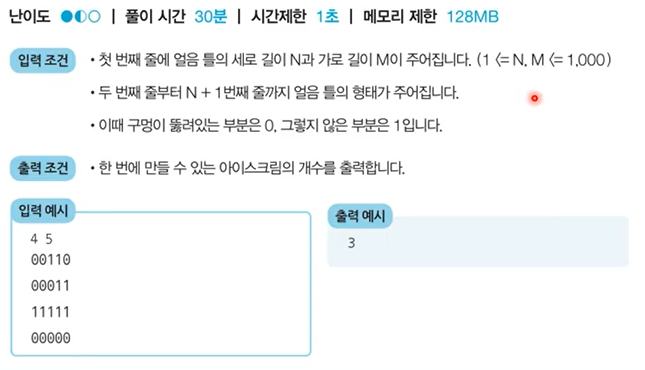

In [ ]:

n, m = map(int, input().split())

graph = []
for i in range(n):
    graph.append(list(map(int, input()))) 

#모든 노드(위치)에 대하여 음료수 채우기
result = 0
for i in range(n):
    for j in range(m):
        if dfs(i, j) == True: #현재 위치에서 DFS 수행
            result += 1
print(result)

def dfs(x,y):

  if x<= -1 or x>=n or y <= -1 or y >= m:
      return False
   
  if graph[x][y] == 0:   #현재 노드를 아직 방문하기 않았다면  
      graph[x][y] = 1    #방문처리
      dfs(x -1, y)       #상, 하, 좌, 우 재귀 호출
      dfs(x, y -1)
      dfs(x + 1, y)
      dfs(x, y + 1)
      return True
  return False

print(result)

4 5
00110
00011
11111
00000
3


#미로탈출




*   BFS: 시작 지점에서 가까운 노드부터 탐색
*   상, 하, 좌, 우 노드 거리 1로 동일
*   (1, 1) 지점부터 BFS 수행하여 모든 노드 최단 거리 값 기록
*   최단 경로의 값들이 1씩 증가하는 형태


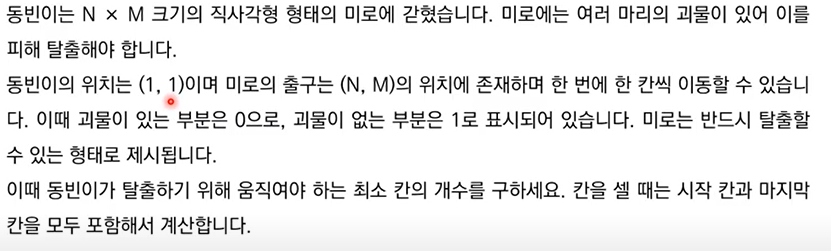

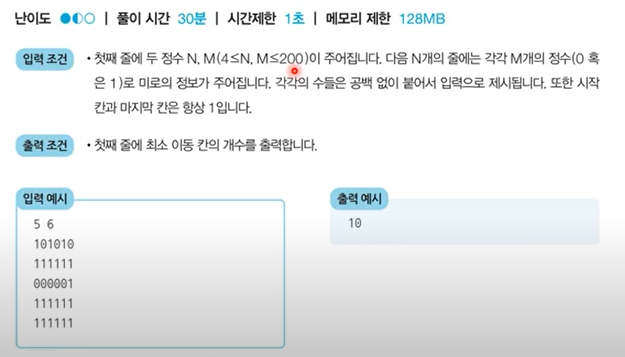

In [ ]:


from collections import deque

n, m = map(int, input().split())

graph = []
for i in range(n):
    graph.append(list(map(int, input()))) #공백으로 구분되지 않고 0과 1로 구성된 문자열을 입력받은 후 int형으로 바꾸어 다시 리스트로 만드는 방법 

dx = [-1, 1, 0, 0]
dy = [0, 0, -1, 1]


def bfs(x, y):
    queue = deque()
    queue.append((x, y))

    while queue:
        x, y = queue.popleft()

        for i in range(4): #현재 위치에서 4가지 방향으로 위치 확인
            nx = x + dx[i]
            ny = y + dy[i]

            if nx < 0 or nx >= n or ny < 0 or ny >= n:
                continue
            if graph[nx][ny] == 0: #괴물이 존재해서 이동할 수 없으면 무시1
                continue
            if graph[nx][ny] == 1:
                graph[nx][ny] = graph[x][y] + 1 #직전 노드에서 1 더한 값
                queue.append((nx, ny))

    return graph[n - 1][m -1]

print(bfs(0, 0))



5 6
101010
111111
000001
111111
111111
1


In [ ]:
from collections import deque

# N, M을 공백을 기준으로 구분하여 입력 받기
n, m = map(int, input().split())
# 2차원 리스트의 맵 정보 입력 받기
graph = []
for i in range(n):
    graph.append(list(map(int, input())))

# 이동할 네 가지 방향 정의 (상, 하, 좌, 우)
dx = [-1, 1, 0, 0]
dy = [0, 0, -1, 1]

# BFS 소스코드 구현
def bfs(x, y):
    # 큐(Queue) 구현을 위해 deque 라이브러리 사용
    queue = deque()
    queue.append((x, y))
    # 큐가 빌 때까지 반복하기
    while queue:
        x, y = queue.popleft()
        # 현재 위치에서 4가지 방향으로의 위치 확인
        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            # 미로 찾기 공간을 벗어난 경우 무시
            if nx < 0 or nx >= n or ny < 0 or ny >= m:
                continue
            # 벽인 경우 무시
            if graph[nx][ny] == 0:
                continue
            # 해당 노드를 처음 방문하는 경우에만 최단 거리 기록
            if graph[nx][ny] == 1:
                graph[nx][ny] = graph[x][y] + 1
                queue.append((nx, ny))
    # 가장 오른쪽 아래까지의 최단 거리 반환
    return graph[n - 1][m - 1]

# BFS를 수행한 결과 출력
print(bfs(0, 0))

5 6
101010
111111
000001
111111
111111
10
